In [9]:
def space(n: int) -> int:
    if n == 0:
        return 0
    return 2**(n-1)

def haloRad(r : int, n: int) -> int:
    return r*(1+space(n))

def tileRad(r: int, n: int, b: int) -> int:
    return 2*haloRad(r, n) + b
    


In [10]:
print('Idx', 'Space', 'Halo R', 'Tile D', 'Area', 'KB (b)', 'KB (3b)', sep='\t')
r = 2
b = 16
for n in range(0,9):
    s = space(n)
    d = haloRad(r, n)
    t = tileRad(r, n, b)
    a = t**2
    kb = a/1024
    kb3 = 3*kb

    if s == b: 
        print('>=5', s, d, t, a, f'{kb:.2f}', f'{kb3:.2f}', sep='\t')
        break

    print(n, s, d, t, a, f'{kb:.2f}', f'{kb3:.2f}', sep='\t')

Idx	Space	Halo R	Tile D	Area	KB (b)	KB (3b)
0	0	2	20	400	0.39	1.17
1	1	4	24	576	0.56	1.69
2	2	6	28	784	0.77	2.30
3	4	10	36	1296	1.27	3.80
4	8	18	52	2704	2.64	7.92
>=5	16	34	84	7056	6.89	20.67


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

r = 2
b = 16
n = 3

access = {}

for bx in range(b):
    for by in range(b):
        for dx in range(-r, r+1):
            for dy in range(-r, r+1):
                pos = (bx+dx*(1+space(n)), by+dy*(1+space(n)))
                if not pos in access:
                    access[pos] = 0
                
                access[pos] += 1

xs = [x for x, _ in access.keys()]
ys = [y for _, y in access.keys()]

x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)

# Build 2D array (note: adjust origin if needed)
grid = np.full((y_max - y_min + 1, x_max - x_min + 1), 0)
for (x, y), val in access.items():
    grid[y - y_min, x - x_min] = val


Idx	Space	Halo R	Tile D	Area	KB (b)	KB (3b)
0	0	2	36	1296	1.27	3.80
Average access 19.753086419753085


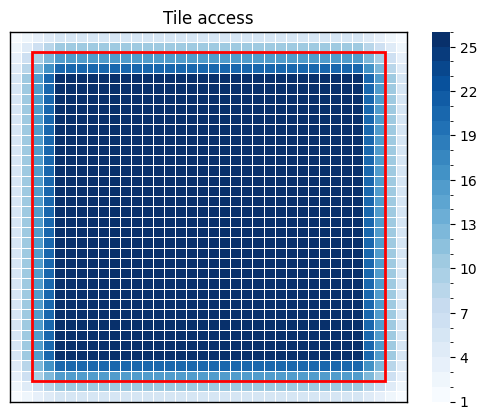

Idx	Space	Halo R	Tile D	Area	KB (b)	KB (3b)
1	1	4	40	1600	1.56	4.69
Average access 16.0


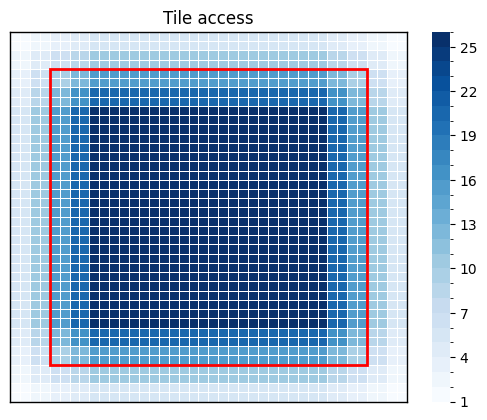

Idx	Space	Halo R	Tile D	Area	KB (b)	KB (3b)
2	2	6	44	1936	1.89	5.67
Average access 13.223140495867769


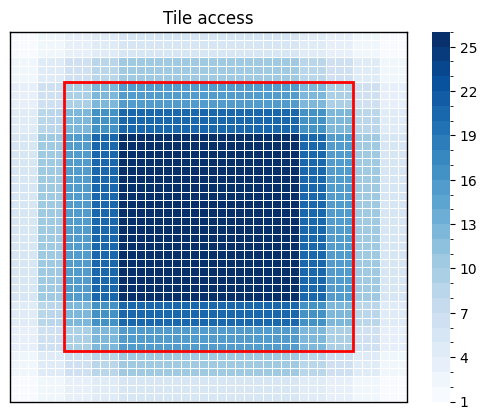

Idx	Space	Halo R	Tile D	Area	KB (b)	KB (3b)
3	4	10	52	2704	2.64	7.92
Average access 9.467455621301776


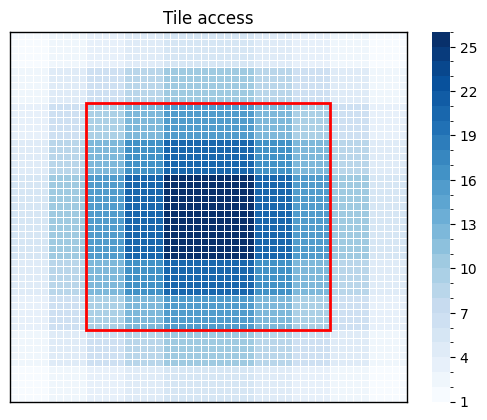

Idx	Space	Halo R	Tile D	Area	KB (b)	KB (3b)
4	8	18	68	4624	4.52	13.55
Average access 5.536332179930795


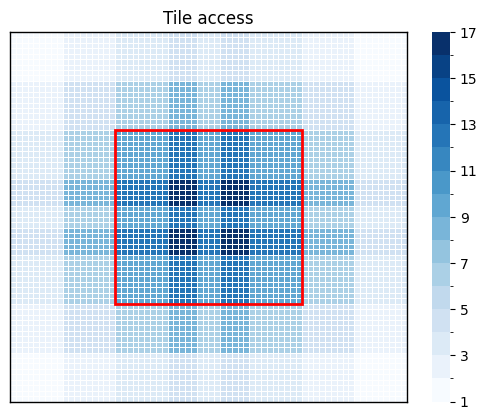

Idx	Space	Halo R	Tile D	Area	KB (b)	KB (3b)
5	16	34	100	10000	9.77	29.30
Average access 2.56


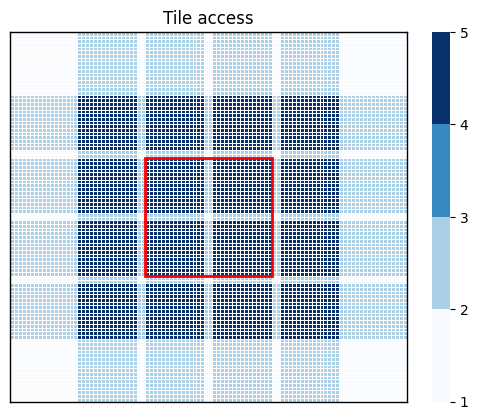

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import numpy as np

k = 5
r = 2
b = 1<<k
for n in range(k+1):
    s = space(n)
    d = haloRad(r, n)
    t = tileRad(r, n, b)
    a = t**2
    kb = a/1024
    kb3 = 3*kb

    print('Idx', 'Space', 'Halo R', 'Tile D', 'Area', 'KB (b)', 'KB (3b)', sep='\t')

    if s == b: 
        print('>=5', s, d, t, a, f'{kb:.2f}', f'{kb3:.2f}', sep='\t')
        break

    print(n, s, d, t, a, f'{kb:.2f}', f'{kb3:.2f}', sep='\t')
    
    access = {}

    for bx in range(b):
        for by in range(b):
            for dx in range(-r, r+1):
                for dy in range(-r, r+1):
                    pos = (bx+dx*(1+space(n)), by+dy*(1+space(n)))
                    if not pos in access:
                        access[pos] = 0
                    
                    access[pos] += 1

    #assert(len(access) == a)

    xs = [x for x, _ in access.keys()]
    ys = [y for _, y in access.keys()]

    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)

    # Build 2D array (note: adjust origin if needed)
    grid = np.full((y_max - y_min + 1, x_max - x_min + 1), 0)
    for (x, y), val in access.items():
        grid[y - y_min, x - x_min] = val

    print('Average access', grid.mean())
        
    cmap = plt.get_cmap("Blues")
    levels = np.arange(grid.min(), grid.max() + 2)
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    ax = sns.heatmap(
        grid,
        cmap="Blues",
        norm=norm,
        linewidths=0.5,
        linecolor='white')

    rect = patches.Rectangle((haloRad(r,n), haloRad(r,n)), b, b, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    ax.set_xticks([])
    ax.set_yticks([])

    # Add border via spines
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1)
        spine.set_edgecolor('black')

    plt.title("Tile access")
    plt.show()